# Исследование надёжности заёмщиков

Цель исследования высянить:

    1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
    2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
    3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
    4. Как разные цели кредита влияют на его возврат в срок?

### Шаг 1. Обзор данных

In [75]:
import pandas as pd
import seaborn

In [76]:
data = pd.read_csv('/anaconda_files/ya/p2_banki/data.csv')
# присваиваю файлу переменную data и открываю таблицу

In [77]:
data.info()
# метод info() для общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [78]:
data.head(10)
# вывожу первые 10 срок для понимания с какими данными буду работать

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


В полученых показателях видно:

    - в таблице 12 колонок и 21525 строк
    - типы соотсветсвую значениям в колонках где должны быть целые - int, где текст - object, там где дробные - float
    - названия колонок без ошибок, с маленькой буквы, змеиный регистр
    - разный регистр в значениях столбцов
    - минусовые значения возможно, там где их не должно быть

## Шаг 2 Предобработка данных

### Шаг 2.1 Заполнение пропусков

In [79]:
print(data.isna().sum())
# ищу в каких столбцах есть пропуски

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Анализ выявил что в стоблцах days_employed и total_income есть пропуски. 

    days_employed — общий трудовой стаж в днях
    total_income — ежемесячный доход

In [80]:
missing_values = data['total_income'].isna().sum(
) / data['total_income'].value_counts().sum()
# процент пропущенных значний в столбце days_employed равен total_income

In [81]:
print(
    f'Доля пропущенных значений в столбцах \'total_income\', \'days_employed\' - {missing_values:.2%}')
# вывожу процент пропущенных значений

Доля пропущенных значений в столбцах 'total_income', 'days_employed' - 11.23%


Возможные причины появления пропусков в данных:
    
    - отсутсвие официальной работы у заемщиков
    - отсутсвие официальных доходов
    - человеческий фактор
    - повреждение/сбой в данных

In [82]:
print('median', data['total_income'].median())
print('mean', data['total_income'].mean())
print('min', data['total_income'].min())
print('max', data['total_income'].max())
print('NA', data['total_income'].isna().sum())
# проверим на аномальные значения уровня зарплат (например на отрицательное число)

median 145017.93753253992
mean 167422.3022081719
min 20667.26379327158
max 2265604.028722744
NA 2174


In [83]:
total_income_median = data['total_income'].median()
# посчитали медиану

In [84]:
data['total_income'] = data['total_income'].fillna(total_income_median)
# добавили значение медианы в столбец таблицы вместо пропусков

In [85]:
print(data['total_income'].isna().sum())
# проверили столбец на пропуски

0


### Шаг 2.2 Проверка данных на аномалии и исправления

In [86]:
print('min', data['children'].min())
print('max', data['children'].max())
print('NA', data['children'].isna().sum())
# проверим значения столбца с колличеством детей

min -1
max 20
NA 0


In [87]:
print(data['children'].value_counts())
# нужно посмотреть значения из за странного количества детей

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [88]:
data = data.drop(data[data['children'] == 20].index)
# удалим строки где детей больше чем обычно

In [89]:
data = data.reset_index(drop=True)
# сбросим индекс

In [90]:
data['children'] = data['children'].abs()
# применим функцию abs()

In [91]:
print('min', data['children'].min())
# проверим значения

min 0


In [92]:
print('median', data['days_employed'].median())
print('mean', data['days_employed'].mean())
print('min', data['days_employed'].min())
print('max', data['days_employed'].max())
print('NA', data['days_employed'].isna().sum())
# посмотрим на значения в столбце колличество отработанных дней

median -1204.1647137573468
mean 63141.23352703742
min -18388.949900568383
max 401755.40047533
NA 2165


In [93]:
data['days_employed'] = data['days_employed'].abs()
# применим функцию abs() на столбце days_employed

In [94]:
print('min', data['days_employed'].min())
# проверим работает ли функция

min 24.14163324048118


In [95]:
def days_employed_correct(row):
    """
    берет данные из столбца, делит его на 365
    затирает значение чей стаж более 57 лет, при этом пустые значения не трогает
    """
    if 0 < row / 365 <= 57:
        return row
    if row / 365 > 57:
        return 365 * 57

In [96]:
data['days_employed'] = data['days_employed'].apply(days_employed_correct)
# применим функцию days_employed_correct

In [97]:
print('median', data['days_employed'].median())
print('mean', data['days_employed'].mean())
print('min', data['days_employed'].min())
print('max', data['days_employed'].max())
print('NA', data['days_employed'].isna().sum())
# проверим столбец days_employed на пропуски а также посомтрим значения которые есть в столбце

median 2196.507938101055
mean 5643.325349318134
min 24.14163324048118
max 20805.0
NA 2165


In [98]:
days_employed_median = data['days_employed'].median()
# находим медиану для столбца days_employed

In [99]:
data['days_employed'] = data['days_employed'].fillna(days_employed_median)
# добавляем значения медианы вместо пропусков

In [27]:
print(data['days_employed'].isna().sum())
# проверим на наличие пустых значений

0


In [28]:
print('min', data['dob_years'].min())
print('max', data['dob_years'].max())
print('NA', data['dob_years'].isna().sum())
# проверим значения столбца с возрастом клиента

min 0
max 75
NA 0


In [29]:
to_young = data[data['dob_years'] < 18].value_counts(
).sum() / data[data['dob_years'] > 18].value_counts().sum()
# найдем процент несовершенно летних от общего числа

In [30]:
print(f'Процент значений несовершенно летних: {to_young:.2%}')
# выведем значение на экран

Процент значений несовершенно летних: 0.47%


In [31]:
data = data.drop(data[data['dob_years'] < 18].index)
# минимальный возраст для получения кредита составляет 18 лет, таких данных меньше 1% - удаляем

In [32]:
data = data.reset_index(drop=True)
# сбросим индекс

In [33]:
print('min', data['education_id'].min())
print('max', data['education_id'].max())
print('NA', data['education_id'].isna().sum())
# проверим значения столбца с идентификатором уровня образования

min 0
max 4
NA 0


In [34]:
print('min', data['family_status_id'].min())
print('max', data['family_status_id'].max())
print('NA', data['family_status_id'].isna().sum())
# проверим значения столбца с идентификатором семейного положения

min 0
max 4
NA 0


In [35]:
print('min', data['debt'].min())
print('max', data['debt'].max())
print('NA', data['debt'].isna().sum())
# проверим значения столбца с задолженностью

min 0
max 1
NA 0


In [36]:
print('min', data['total_income'].min())
print('max', data['total_income'].max())
print('NA', data['total_income'].isna().sum())
# проверим значения столбца с ежемесячным доходом

min 20667.26379327158
max 2265604.028722744
NA 0


Возможные причины отрицательных значений:

    - данные скопировались с тире, и машина считала их за минус
    - человеческий фактор

### Шаг 2.3. Изменение типов данных.

In [37]:
data['total_income'] = data['total_income'].astype(int)
# поменяем тип данных в столбце total_income на вещественный int

In [38]:
data['days_employed'] = data['days_employed'].astype(int)
# поменяем тип данных в столбце days_employed на вещественный int

### Шаг 2.4. Удаление дубликатов.

In [39]:
data['education'] = data['education'].str.lower()
# приведем весь столбец к одному регистру

In [40]:
print(data['education'].value_counts())
# найдем все неявные дубликаты

среднее                15110
высшее                  5211
неоконченное высшее      740
начальное                282
ученая степень             6
Name: education, dtype: int64


In [41]:
print(data['income_type'].value_counts())
# найдем все неявные дубликаты

сотрудник          11022
компаньон           5043
пенсионер           3827
госслужащий         1451
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64


In [42]:
print(data['gender'].unique())
# найдем все неявные дубликаты

['F' 'M' 'XNA']


In [43]:
print(data[data['gender'] == 'XNA'].index)
# ищу номер строки XNA

Int64Index([10621], dtype='int64')


In [44]:
print(data.loc[10701])
# посмотрим какие данные содержит

children                          2
days_employed                    88
dob_years                        31
education                   среднее
education_id                      1
family_status       женат / замужем
family_status_id                  0
gender                            M
income_type               сотрудник
debt                              0
total_income                 229730
purpose                  автомобиль
Name: 10701, dtype: object


In [45]:
data = data.drop(data[data['gender'] == 'XNA'].index)
# удалим одну строку которая может портить данные, строка одна из 20 тысяч, поэтому на выводы это не повлияет

In [46]:
print(data['gender'].unique())
# проверим на удалние

['F' 'M']


In [47]:
print(data['family_status'].value_counts())
# дублей нет, но есть слово с большой буквы

женат / замужем          12283
гражданский брак          4143
Не женат / не замужем     2788
в разводе                 1183
вдовец / вдова             951
Name: family_status, dtype: int64


In [48]:
data['family_status'] = data['family_status'].str.lower()
# все к единому регистру

In [49]:
print(data['purpose'].value_counts())
# найдем неявные дубликаты

свадьба                                   791
на проведение свадьбы                     769
сыграть свадьбу                           765
операции с недвижимостью                  672
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   650
операции с коммерческой недвижимостью     645
операции с жильем                         643
покупка жилья для семьи                   639
покупка жилья                             638
жилье                                     637
недвижимость                              629
операции со своей недвижимостью           629
строительство собственной недвижимости    627
строительство жилой недвижимости          622
строительство недвижимости                620
покупка своего жилья                      619
покупка недвижимости                      618
ремонт жилью                              608
покупка жилой недвижимости                602
на покупку своего автомобиля              502
заняться высшим образованием      

In [50]:
data = data.drop_duplicates().reset_index(drop=True)
# удалим из таблицы явные дубликаты со сбросом индекса

In [51]:
print(data.duplicated().sum())
# проверим на дубликаты

0


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [52]:
education_dict = data[['education_id', 'education']]
family_dict = data[['family_status_id', 'family_status']]
# создаем два новых дата фрейма

In [53]:
data = data.drop(columns=['education', 'family_status'], axis=1)
# удаляем столбцы из исходной таблицы

In [54]:
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
# удаляем дубликаты в словаре

In [55]:
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
# удаляем дубликаты в словаре

### Шаг 2.6. Категоризация дохода.

In [56]:
def total_income_category_function(row):
    """
    присваивает категории A, B, C, D, E в зависимости от уровня дохода 

    """
    if row <= 30000:
        return 'E'
    if 30001 <= row <= 50000:
        return 'D'
    if 50001 <= row <= 200000:
        return 'C'
    if 200001 <= row <= 1000000:
        return 'B'
    if row > 1000001:
        return 'A'
    else:
        return 'no category'

In [57]:
data['total_income_category'] = data['total_income'].apply(
    total_income_category_function)
# добавим колонку категорий в таблицу data применив функцию total_income_category_function

In [58]:
print(data['total_income_category'].value_counts())
# проверим сработала ли функция total_income_category_function

C    15888
B     4994
D      348
A       25
E       22
Name: total_income_category, dtype: int64


### Шаг 2.7. Категоризация целей кредита.

In [59]:
def purpose_category_function(row):
    """
    ищет часть слова и если оно есть, подставляет заданое значение
    """
    if 'авто' in row:
        return 'операции с автомобилем'
    if 'жил' in row or 'виж' in row:
        return 'операции с недвижимостью'
    if 'свад' in row:
        return 'проведение свадьбы'
    if 'обра' in row:
        return 'получение образования'
    else:
        return 'no category'
# функция для сортировки по категориям

In [60]:
data['purpose_category'] = data['purpose'].apply(purpose_category_function)
# добавим колонку категорий в таблицу data применив функцию purpose_category_function

In [61]:
print(data['purpose_category'].value_counts())
# проверим сколько категорий мы получили

операции с недвижимостью    10727
операции с автомобилем       4269
получение образования        3980
проведение свадьбы           2301
Name: purpose_category, dtype: int64


## 3 Ответы на вопросы.

### 3.1 Вопрос 1

Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [62]:
data = data.drop(data[data['children'] == 5].index)
# удалим статистически не значимые данные где детей 5,
# иначе таблички получаются не красивыми, а выводы не отражают реальности

In [63]:
data = data.reset_index(drop=True)
# сбросим индекс

In [64]:
children_pivot = 100 - (data.pivot_table(index='children',
                        values='debt') * 100).sort_values(by='children')
children_pivot.columns = ['return_percent']
# посчитаем с помощью сводной таблицы процент возврата в зависимости от колличества детей

<AxesSubplot:xlabel='children'>

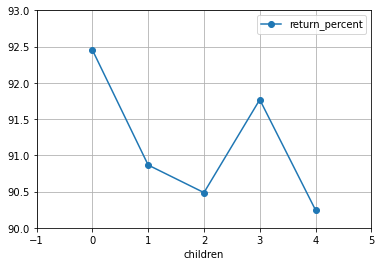

In [65]:
children_pivot.plot(xlim=(-1, 5), ylim=(90, 93), style='o-', grid=True)
# выведем диаграмму зависимсоти задолженности к колличеству детей

#### Ответ на вопрос 1:
"Есть ли зависимость между количеством детей и возвратом кредита в срок?"

Да, такая зависимость есть: 
    
    - Семьи где 0 детей, чаще всех возвращают кредит в срок - 92.45%. 
    - Семьи где 4 детей, хуже всех возвращают кредит в срок - 90.24%.

### 3.2 Вопрос 2

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [66]:
family_status_pivot = data.pivot_table(
    index='family_status_id', values=['debt'])
family_status_pivot['percent'] = 100 - family_status_pivot * 100
family_status_pivot = (
    family_status_pivot.merge(family_dict, on='family_status_id').sort_values(
        by='percent', ascending=False)
)
family_status_pivot
# построим сводную таблицу, соеденим со словарем family_dict и
# посчитаем процент возварта в зависимости от семейного положения.

,family_status_id,debt,percent,family_status
2,2,0.065263,93.473684,вдовец / вдова
3,3,0.071006,92.899408,в разводе
0,0,0.075521,92.447895,женат / замужем
1,1,0.093074,90.692588,гражданский брак
4,4,0.097666,90.233393,не женат / не замужем


In [67]:
common_info = data.merge(family_dict, on='family_status_id')
common_info = common_info.merge(education_dict, on='education_id')

In [68]:
data_fa = common_info.pivot_table(
    index='family_status', values='debt', aggfunc=['count', 'sum', 'mean'])
data_fa.columns = ['Всего кредитополучателей',
                   'Всего должников', 'Доля должников']
display(data_fa)

,Всего кредитополучателей,Всего должников,Доля должников
family_status,,,
в разводе,1183,84,0.071006
вдовец / вдова,950,62,0.065263
гражданский брак,4115,383,0.093074
женат / замужем,12235,924,0.075521
не женат / не замужем,2785,272,0.097666


<AxesSubplot:xlabel='percent', ylabel='family_status'>

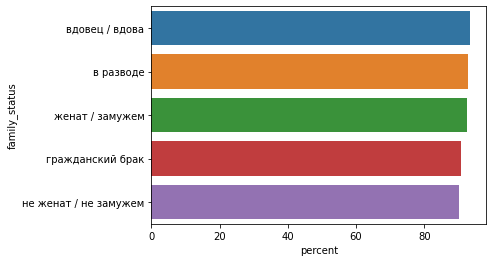

In [69]:
seaborn.barplot(x=family_status_pivot['percent'],
                y=family_status_pivot['family_status'])
# выведем диаграмму

#### Ответ на вопрос 2:
"Есть ли зависимость между семейным положением и возвратом кредита в срок?"

Да, такая зависимость есть:

    - Больше всех возвращают, те кто потерял супруга - 93.47%
    - Меньше всех возвращают клиенты не женатые или не замужние - 90.23%
    
В целом разница между группами по типу семейного пложения, в пределах 1% - 2%

### 3.3 Вопрос 3

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [70]:
income_category_percent = (
    (100 - data.pivot_table(index='total_income_category', values='debt') * 100)
    .reset_index()
    .sort_values(by='debt', ascending=False)
)
income_category_percent
# делаем сводную таблицу, считаем процент возврата по категориям дохода, сортируем по убыванию,
# сбрасываем индекс чтобы получить столбец категорий и обратиться к нему в диагремме

,total_income_category,debt
3,D,93.948127
1,B,92.925852
0,A,92.000000
2,C,91.519768
4,E,90.909091


<AxesSubplot:xlabel='debt', ylabel='total_income_category'>

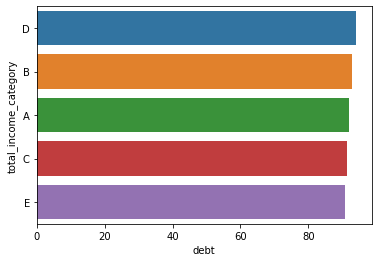

In [71]:
seaborn.barplot(x=income_category_percent['debt'],
                y=income_category_percent['total_income_category'])
# сделаем диграмму процент возврата кредита в срок в зависимости от дохода

#### Ответ на вопрос 3:
"Есть ли зависимость между уровнем дохода и возвратом кредита в срок?"

Да, такая зависимость есть:

    - Больше всех возвращают клиенты чей доход от 50 000 до 200 000 из категории 'D' - 93.95%
    - Меньше всех возвращают клиенты чей доход 30 000 и менее из категории 'Е' - 90.90%

### 3.4 Вопрос 4

Как разные цели кредита влияют на его возврат в срок?

In [72]:
purpose_category_percent = (
    (100 - data.pivot_table(index='purpose_category', values='debt') * 100)
    .reset_index()
    .sort_values(by='debt', ascending=False)
)
purpose_category_percent
# найдем процент возврата в зависимости от целей кредита

,purpose_category,debt
1,операции с недвижимостью,92.753218
3,проведение свадьбы,92.130435
2,получение образования,90.726313
0,операции с автомобилем,90.672604


<AxesSubplot:xlabel='debt', ylabel='purpose_category'>

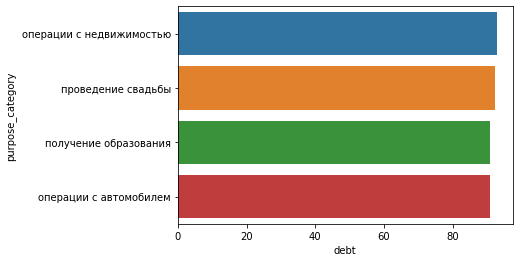

In [73]:
seaborn.barplot(
    x=purpose_category_percent['debt'], y=purpose_category_percent['purpose_category'])
# выведем диаграмму возврата в срок по целям кредита

#### Ответ на вопрос 4:
"Как разные цели кредита влияют на его возврат в срок?"

    - Больше всех возвращают клиенты, которые берут кредит на операции с недвижимостью - 92.75%
    - Меньше всех возвращают клиенты, которые берут кредит на операции с автомобилем - 90.67%

## Общий вывод:

Портрет клиента, который чаще других вернет кредит в срок: клиент у которого нет детей, не замужем(не женат), имеет доход от 50 000 до 200 000 ежемесячно и целью кредит является операции с недвижимостью - такой клиент вернет кредит без задолженностей в 92,94% случаев.

Портрет клиента, который меньше других вернет кредит в срок: клиент у которого 4 детей, в гражданском браке, доход менее 30 000 ежемесячно, а цель кредита оперции с автомобилем - такой клиент вернет кредит без задолженностей в 90,73% слуаев.